## Analyzing CIA Factbook Data Using SQLite 

In [27]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Connecting to the database and returning results in a table

conn = sqlite3.connect("factbook.db")
query = "SELECT * FROM sqlite_master WHERE type='table';"
results_cia_facbook_df = pd.read_sql_query(query,conn)
results_cia_facbook_df

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [67]:
## Query and rendering the first 5 rows for the tables 
query_1 = "select * from facts order by population limit 5"
results_facts_table_df = pd.read_sql_query(query_1, conn)
results_facts_table_df


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,198,at,Ashmore and Cartier Islands,5.0,5.0,0.0,None,None,None,None,None,2015-11-01 13:36:08.110412,2015-11-01 13:36:08.110412
1,201,cr,Coral Sea Islands,3.0,3.0,0.0,None,None,None,None,None,2015-11-01 13:36:14.538308,2015-11-01 13:36:14.538308
2,202,hm,Heard Island and McDonald Islands,412.0,412.0,0.0,None,None,None,None,None,2015-11-01 13:36:16.132554,2015-11-01 13:36:16.132554
3,208,ip,Clipperton Island,6.0,6.0,0.0,None,None,None,None,None,2015-11-01 13:36:36.882778,2015-11-01 13:36:36.882778
4,210,fs,French Southern and Antarctic Lands,NaN,NaN,NaN,None,None,None,None,None,2015-11-01 13:36:43.532683,2015-11-01 13:36:43.532683


In [14]:
# Summary Statistics 

query_2 = "select min(population), max(population), min(population_growth), max(population_growth) from facts"
results_summ_stats_df = pd.read_sql_query(query_2, conn)
results_summ_stats_df

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [15]:
# Exploring outliers
# Min pupolation name
query_3 = "select name, min(population) min_popol from facts where population == (select min(population) from facts);"
results_exploring_outliers_df_3 = pd.read_sql_query(query_3, conn)
print(results_exploring_outliers_df_3)

#Max population name
query_4 = "select name, max(population) max_popl from facts where population == (select max(population) from facts);"
results_exploring_outliers_df_4 = pd.read_sql_query(query_4, conn)
print(results_exploring_outliers_df_4)


         name  min_popol
0  Antarctica          0
    name    max_popl
0  World  7256490011


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c3437e940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9c33f559b0>]], dtype=object)

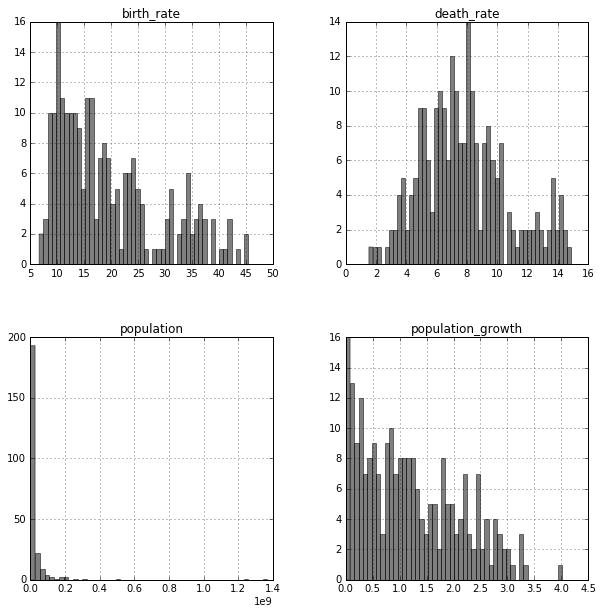

In [63]:
# Plotting results of queries 
query_5 = "select population, population_growth, birth_rate, death_rate from facts where population != (select min(population) from facts) and population != (select max(population) from facts);"
results_exploring_outliers_df_5 = pd.read_sql_query(query_5, conn)

results_exploring_outliers_df_5 = pd.DataFrame(results_exploring_outliers_df_5)
results_exploring_outliers_df_5.hist(color='k', alpha=0.5, bins=50, figsize=(10, 10))




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c3391ca20>]], dtype=object)

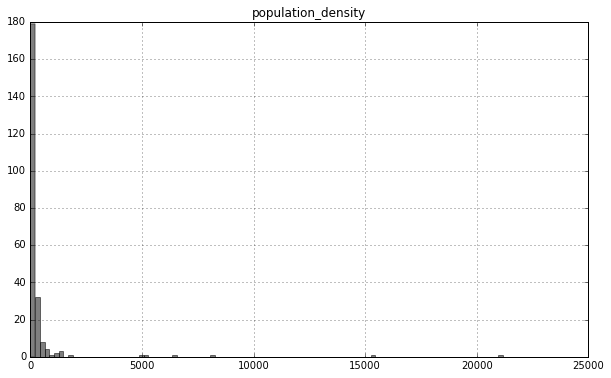

In [66]:
# Finding out population densities
query_6 = "select cast(population as float)/cast(area as float) population_density from facts;"
results_exploring_outliers_df_6 = pd.read_sql_query(query_6, conn)
results_exploring_outliers_df_6.hist(color='k', alpha=0.5, bins=100, figsize=(10, 6))

In [82]:
# Ratios of water to land
query_7 = "select name, cast(area_water as float)/cast(area_land as float) water_to_land from facts where water_to_land > (select AVG(cast(area_water as float)/cast(area_land as float)) from facts) ;"
results_exploring_outliers_df_7= pd.read_sql_query(query_7, conn)
results_exploring_outliers_df_7

,name,water_to_land
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
